# 机器学习实验二

#### 姓名：任薏霖
#### 学号：2011897
#### 专业：物联网工程

### 实验要求

题目：回归模型
基本要求：
1. 构造线性回归模型，并采用批量梯度下降和随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
2. 对于批量梯度下降和随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

中级要求：
探究回归模型在机器学习和统计学上的差异。

高级要求：
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法均可）。

### 导入需要的包

In [1]:
#导入
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

### 数据集预处理

In [2]:
data = pd.read_csv("winequality-white.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
#检查数据集中是否含有空值
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:
quality = data[['quality']]
#提取data数据的最后一列 quality
t = data.iloc[:, 0:11]
#对数据进行标准化
d = (t - t.min()) / (t.max() - t.min())
print(d)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.307692          0.186275     0.216867        0.308282   0.106825   
1          0.240385          0.215686     0.204819        0.015337   0.118694   
2          0.413462          0.196078     0.240964        0.096626   0.121662   
3          0.326923          0.147059     0.192771        0.121166   0.145401   
4          0.326923          0.147059     0.192771        0.121166   0.145401   
...             ...               ...          ...             ...        ...   
4893       0.230769          0.127451     0.174699        0.015337   0.089021   
4894       0.269231          0.235294     0.216867        0.113497   0.112760   
4895       0.259615          0.156863     0.114458        0.009202   0.094955   
4896       0.163462          0.205882     0.180723        0.007669   0.038576   
4897       0.211538          0.127451     0.228916        0.003067   0.032641   

      free sulfur dioxide  

In [5]:
#将标准化的特征值表与quality进行合并
data = pd.concat([d, quality], axis = 1)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

data.to_csv('wine_data.csv') #将处理好的数据另存为新的csv文件

print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  sulphates   alcohol  quality
0          0.307692          0.186275     0.216867        0.308282   0.106825             0.149826              0.373550  0.267785  0.254545   0.267442  0.129032        6
1          0.240385          0.215686     0.204819        0.015337   0.118694             0.041812              0.285383  0.132832  0.527273   0.313953  0.241935        6
2          0.413462          0.196078     0.240964        0.096626   0.121662             0.097561              0.204176  0.154039  0.490909   0.255814  0.338710        6
3          0.326923          0.147059     0.192771        0.121166   0.145401             0.156794              0.410673  0.163678  0.427273   0.209302  0.306452        6
4          0.326923          0.147059     0.192771        0.121166   0.145401             0.156794              0.410673  0.163678  0.427273   0.

In [6]:
df = pd.read_csv("wine_data.csv")
df = df.iloc[:, 1:13]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,6
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,6
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,6
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,6
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129,6
4894,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065,5
4895,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806,6
4896,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194,7


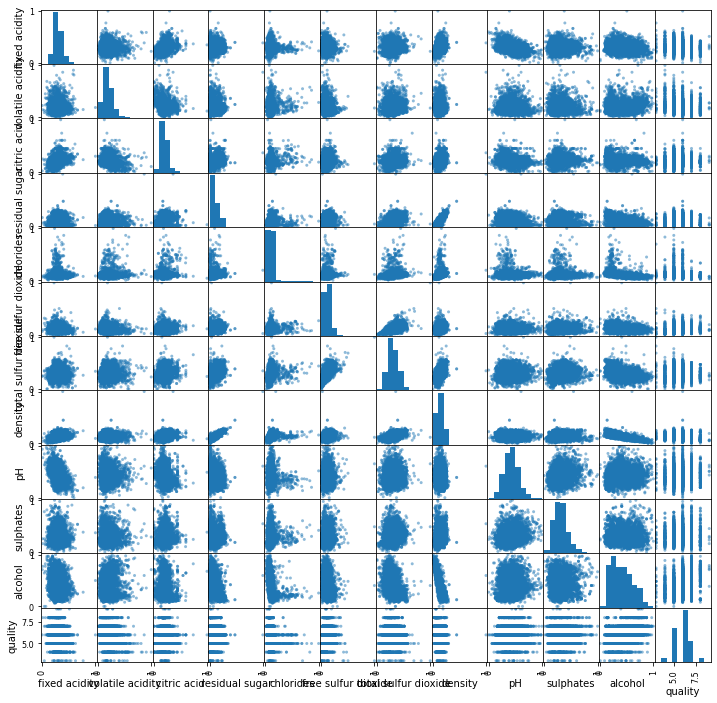

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize = (12, 12));

(12.5, -0.5)

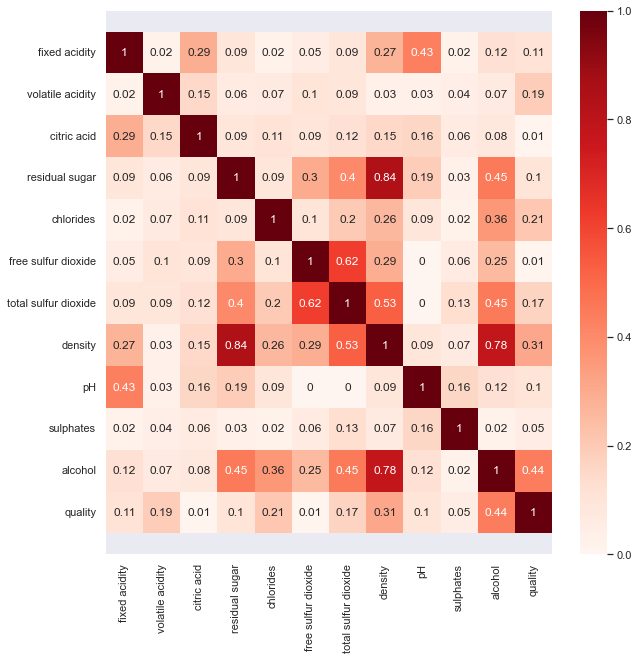

In [8]:
correlation_matrix = np.absolute(data.corr().round(2))
sns.set(rc = {'figure.figsize':(10, 10)})
ax = sns.heatmap(correlation_matrix, annot = True, cmap = 'Reds')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 基本要求

### 分割数据集为训练集和测试集

In [9]:
# 这里注意一个小trick：回归系数会比特征x多一维，为了向量相乘方便，可以在训练集X左侧添加全为1的一列
data = pd.concat([pd.DataFrame(np.ones(data.shape[0]), columns=['x0']), data], axis=1)
#分割训练集
train_data = data.sample(frac = 0.8, random_state = 0, axis = 0)
#分割测试集
text_data = data[~data.index.isin(train_data.index)]


In [10]:
train_x = train_data.iloc[:, :12]
train_y = train_data.iloc[:, 12:]

text_x = text_data.iloc[:, :12]
text_y = text_data.iloc[:, 12:]

In [11]:
train_x

,x0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2762,1.0,0.336538,0.235294,0.210843,0.012270,0.121662,0.020906,0.357309,0.102757,0.472727,0.232558,0.435484
42,1.0,0.307692,0.225490,0.156627,0.104294,0.178042,0.090592,0.350348,0.159823,0.372727,0.279070,0.290323
1419,1.0,0.365385,0.058824,0.445783,0.015337,0.091988,0.087108,0.218097,0.086563,0.318182,0.209302,0.451613
3664,1.0,0.115385,0.205882,0.325301,0.078221,0.077151,0.181185,0.338747,0.051089,0.500000,0.139535,0.790323
2125,1.0,0.211538,0.196078,0.132530,0.177147,0.115727,0.139373,0.357309,0.165606,0.436364,0.279070,0.338710
...,...,...,...,...,...,...,...,...,...,...,...,...
2845,1.0,0.259615,0.137255,0.174699,0.104294,0.056380,0.048780,0.180974,0.115674,0.390909,0.395349,0.467742
3384,1.0,0.288462,0.147059,0.180723,0.097393,0.103858,0.139373,0.394432,0.144399,0.481818,0.395349,0.419355
2056,1.0,0.288462,0.127451,0.162651,0.269172,0.097923,0.135889,0.317865,0.250434,0.527273,0.162791,0.112903
4016,1.0,0.326923,0.313725,0.144578,0.121166,0.136499,0.149826,0.329466,0.176403,0.436364,0.348837,0.193548


In [12]:
text_x

,x0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
7,1.0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
21,1.0,0.250000,0.225490,0.228916,0.035276,0.086053,0.059233,0.215777,0.078851,0.409091,0.151163,0.483871
24,1.0,0.269231,0.186275,0.246988,0.010736,0.127596,0.048780,0.308585,0.154039,0.636364,0.290698,0.322581
25,1.0,0.307692,0.166667,0.192771,0.128834,0.109792,0.188153,0.547564,0.161751,0.481818,0.325581,0.387097
...,...,...,...,...,...,...,...,...,...,...,...,...
4877,1.0,0.201923,0.450980,0.000000,0.003067,0.068249,0.034843,0.169374,0.110854,0.481818,0.162791,0.129032
4884,1.0,0.259615,0.245098,0.228916,0.118098,0.115727,0.229965,0.382831,0.150569,0.381818,0.325581,0.258065
4885,1.0,0.269231,0.254902,0.240964,0.115031,0.109792,0.229965,0.373550,0.150954,0.390909,0.325581,0.250000
4890,1.0,0.221154,0.254902,0.174699,0.024540,0.080119,0.080139,0.211137,0.043763,0.309091,0.255814,0.612903


In [13]:
train_x = train_x.to_numpy()
train_y = train_y.to_numpy()
text_x = text_x.to_numpy()
text_y = text_y.to_numpy()

In [14]:
#初始化回归系数
t_theta = np.random.randn(train_x.shape[1], 1)
t_theta_T = t_theta.T
#t_theta
t_coef = t_theta
t_coef

array([[ 0.42023214],
       [ 0.70132557],
       [-0.36896723],
       [-0.93551505],
       [ 2.68712197],
       [-1.15655271],
       [-1.19983376],
       [ 1.56516553],
       [-0.39509006],
       [-0.0829456 ],
       [ 1.8432112 ],
       [-0.67693911]])

### 随机梯度下降

In [15]:
#n_epoch 训练次数
#l_rate  训练步长

def Random_grad(x, y, theta, alpha, iters):
    """
    :param alpha: 梯度下降学习率/步长
    :param iters: 训练次数
    :param theta: 一般初始设置为[[0, 0, 0]]，初值对梯度下降收敛速度影响大
    :param x: 二维matrix，特征向量集
    :param y: 二维matrix，结果集
    :return: 
    """
    ept=0.001 #精度
    loss=1 #定义一个损失 方便进入循环体 后来表示两次迭代损失函数的差异
    i = 0
    numsSample = x.shape[0]
    while i < iters and loss > ept:
        t = np.random.randint(0, numsSample) #随机抽取一个样本
 
        # for t in range(numsSample): 这样其实也是遍历了所有数据
        #     partial=X[i:i+1,:].T.dot((X[i:i+1,:].dot(theta)-y[i,:]).reshape(1,1)) #损失函数关于theta的偏导数
        #     theta=theta-alpha*partial
        partial = x[t:t + 1, :].T.dot((x[t:t + 1, :].dot(theta) - y[t, :]).reshape(1, 1)) #损失函数关于theta的偏导数 注意shape必须都为2维
        theta = theta - alpha * partial
        i += 1
        loss = (1 / (2 * x.shape[0])) * np.sum((x.dot(theta) - y)**2) #计算两次迭代之间的差异(损失函数) 无明显差异就说明算法收敛到了全局最优解
    return theta


In [16]:
#定义梯度下降学习率数组
alpha = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]
for i in range(0, 6):
    theta = Random_grad(train_x, train_y, t_coef, alpha[i], 50)
    print("theta：", theta.T)

theta： [[ 0.64117277  0.76951532 -0.32887876 -0.88875952  2.70617244 -1.13160216
  -1.17387405  1.6295605  -0.36691614  0.01118072  1.90804008 -0.58092432]]
theta： [[ 1.0361759   0.88387187 -0.24543832 -0.80540513  2.74324197 -1.08405337
  -1.12296383  1.7474914  -0.30951146  0.17678115  2.04198457 -0.43784596]]
theta： [[ 2.04201411  1.1667543  -0.04091602 -0.60973334  2.80806197 -0.97396596
  -1.01325458  2.05378787 -0.19268649  0.66117554  2.32558568  0.00917404]]
theta： [[ 2.77111459  1.39309478  0.0999471  -0.43131788  2.87706751 -0.90778103
  -0.93106209  2.23657804 -0.10795136  0.88019252  2.61458475  0.38476068]]
theta： [[ 3.35272691  1.46947834  0.31477483 -0.43135669  2.96961774 -0.72574218
  -0.91038727  2.34579119 -0.07465442  1.08970173  2.70844453  0.96509797]]
theta： [[ 4.19725614  1.69425041 -0.12135489 -0.46544628  2.92223825 -0.94425512
  -0.76536505  2.42852127 -0.1074964   1.44815032  2.06980816  1.40078086]]


### 批量梯度下降

In [17]:
#n_epoch 训练次数
#l_rate  训练步长n

def Batch_grad(x, y, theta, alpha, iters):
    """
    :param alpha: 梯度下降学习率/步长
    :param iters: 训练次数
    :param theta: 一般初始设置为[[0, 0, 0]]，初值对梯度下降收敛速度影响大
    :param x: 二维matrix，特征向量集
    :param y: 二维matrix，结果集
    :return: 
    """
    ept=0.001 #精度
    loss=1 #定义一个损失 方便进入循环体 后来表示两次迭代损失函数的差异
    i = 0
    while i < iters and loss > ept:
        partial = (1 / x.shape[0]) * x.T.dot(x.dot(theta) - y) #损失函数关于theta的偏导数
        theta = theta - alpha * partial
        i += 1
        loss = (1 / (2 * x.shape[0])) * np.sum((x.dot(theta) - y) ** 2)
    return theta

In [18]:
alpha = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]
for i in range(0, 6):
    theta = Batch_grad(train_x, train_y, t_coef, alpha[i], 50)
    print("theta：", theta.T)

theta： [[ 0.65293635  0.76901197 -0.32449091 -0.88863515  2.70638815 -1.13175642
  -1.17330259  1.63266506 -0.36576376  0.01667554  1.91463586 -0.57634773]]
theta： [[ 1.06236573  0.88793027 -0.24648902 -0.80619183  2.74000341 -1.08822666
  -1.12672592  1.75090583 -0.31451944  0.19186753  2.03974655 -0.3982898 ]]
theta： [[ 2.04701494  1.1723608  -0.06118889 -0.60827361  2.81829268 -0.98442138
  -1.0156435   2.03055358 -0.19447808  0.61240971  2.33557698  0.0396178 ]]
theta： [[ 3.00908956  1.44100266  0.10613463 -0.41693947  2.8797821  -0.88810068
  -0.91252324  2.27597435 -0.09600919  1.01854192  2.59458483  0.52422233]]
theta： [[ 3.21833119  1.45508138  0.07458012 -0.38428264  2.82437719 -0.88923779
  -0.91385811  2.19973977 -0.16135535  1.08193584  2.50694989  0.88570875]]
theta： [[ 3.30437703  1.3603129  -0.10948512 -0.38442525  2.67124519 -0.92031955
  -0.95014964  1.90506386 -0.35685674  1.03539812  2.14718749  1.48555242]]


### 预测函数

In [19]:
#row  输入数值
#coef 回归模型参数
def predict(x, theta):
    y = 0
    for i in range(len(x) - 1):
        y += float(theta[i]) * float(x[i])
    return y

### 均方误差

In [20]:
#计算均方误差
def MSE(theta, x, y):
    loss = 0
    for i in range(len(x)):
        temp = predict(x[i], theta) - y[i]
        loss += temp ** 2
    return loss / len(y)

### 可视化

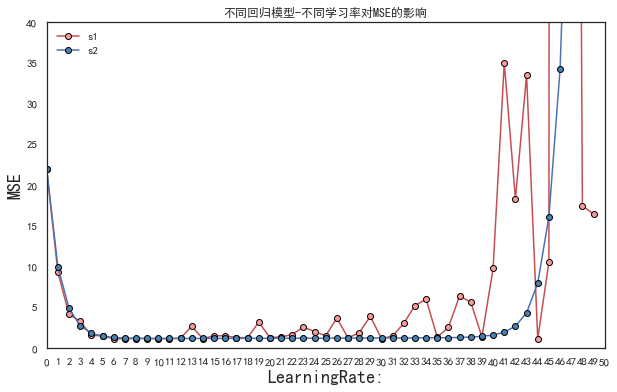

In [21]:
#结果可视化--学习率
MSE_Random = []
MSE_Descent= []

plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(10,6))
#alpha = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]
for i in range(0,50): 
    MSE_Random.append(MSE(Random_grad(train_x, train_y, t_coef, i / 40, 10), train_x, train_y))
    MSE_Descent.append(MSE(Batch_grad(train_x, train_y, t_coef, i / 40, 10), train_x, train_y))

plt.xlabel('LearningRate:', fontsize=18)
plt.ylabel('MSE', fontsize=18)

x_major_locator = plt.MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

plt.xlim(0, 50)
plt.ylim(0, 40)

plt.plot(range(0, 50), MSE_Random, 'r', label='s1', marker = "o", markeredgecolor = 'black', markerfacecolor = '#ff9999')
plt.plot(range(0, 50), MSE_Descent, 'b', label='s2', marker = "o", markeredgecolor = 'black', markerfacecolor = 'steelblue')

plt.legend()
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置字体，不然中文无法显示
#plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style

#plt.grid()

plt.title("不同回归模型-不同学习率对MSE的影响")

plt.show()

       由上图可知，随着学习率的增大，批量梯度下降和随机梯度下降的回归模型的MSE值均有大幅度降低，并在一定程度内保持平衡，但是随机梯度下降法易出现抖动和噪音；当学习率>1时，每次迭代中目标函数可能不会减少，所以可能不会收敛。
       因此，通过上图曲线，可以判断当学习率为0.3时，效果较好。

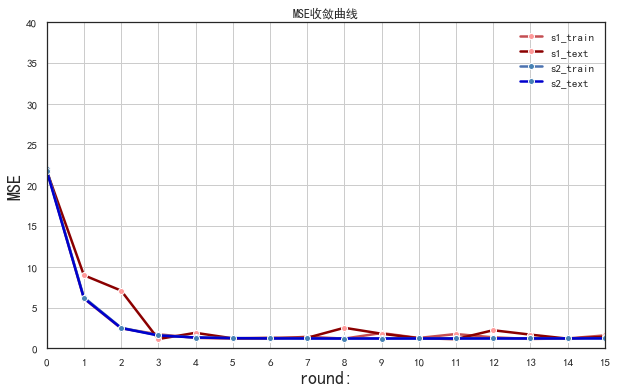

In [22]:
#结果可视化--不同回归算法--学习率根据上问选择0.3
MSE_Random_train = []
MSE_Random_text = []
MSE_Batch_train= []
MSE_Batch_text= []

fig = plt.figure(figsize=(10,6))
plt.style.use('seaborn-ticks')

for i in range(0,50): 
    MSE_Random_train.append(MSE(Random_grad(train_x, train_y, t_coef, 0.3, i), train_x, train_y))
    MSE_Random_text.append(MSE(Random_grad(text_x, text_y, t_coef, 0.3, i), text_x, text_y))
    MSE_Batch_train.append(MSE(Batch_grad(train_x, train_y, t_coef, 0.3, i), train_x, train_y))
    MSE_Batch_text.append(MSE(Batch_grad(text_x, text_y, t_coef, 0.3, i), text_x, text_y))
    
    
plt.xlabel('round:',fontsize=18)
plt.ylabel('MSE',fontsize=18)

x_major_locator = plt.MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

plt.xlim(0, 15)
plt.ylim(0,40)

plt.plot(range(0,50), MSE_Random_train, 'r', label='s1_train', marker = "o", markeredgecolor = 'white', markerfacecolor = '#ff9999', linewidth = 2.5)
plt.plot(range(0,50), MSE_Random_text, 'darkred', label='s1_text', marker = "o", markeredgecolor = 'white', markerfacecolor = '#ff9999', linewidth = 2.5)

plt.plot(range(0,50), MSE_Batch_train, 'b', label='s2_train', marker = "o", markeredgecolor = 'white', markerfacecolor = 'steelblue', linewidth = 2.5)
plt.plot(range(0,50), MSE_Batch_text, 'mediumblue', label='s2_text', marker = "o", markeredgecolor = 'white', markerfacecolor = 'steelblue', linewidth = 2.5)

plt.legend()

plt.grid()

plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置字体，不然中文无法显示

plt.title("MSE收敛曲线")

plt.show()

## 中级要求

### 探究回归模型在机器学习和统计学的差异

## 高级要求

### 岭回归算法

In [23]:
#岭回归算法
def Ridge(x, y, lam):# 可设置岭系数为0.2
    #lam 可初设为0.2
    xMat = np.mat(x)
    yMat = np.mat(y)

    xTx = xMat.T * xMat  # 矩阵乘法  xMat.shape
    rxTx = xTx + np.eye(xMat.shape[1]) * lam  # 岭回归求解的括号的部分
    # 计算矩阵的值,如果值为0，说明该矩阵没有逆矩阵
    if np.linalg.det(rxTx) == 0.0:
        print("This matrix cannot do inverse")
        return
    # xTx.I为xTx的逆矩阵
    theta = rxTx.I * xMat.T * yMat
    return theta

In [24]:
#计算平均误差
def avg_loss(theta, x, y):
    loss = 0
    for i in range(len(x)):
        temp = y[i] - predict(x[i], theta)
        loss += temp 
    return loss / len(y)

In [25]:
# 生成50个值作为label的候选值，此处是alphas
# linspace默认生成50个值，若想生成100个，可以修改为(0.001,1,100)
alphas_to_test = np.linspace(0.001,1)
alphas_to_test

array([0.001     , 0.02138776, 0.04177551, 0.06216327, 0.08255102,
       0.10293878, 0.12332653, 0.14371429, 0.16410204, 0.1844898 ,
       0.20487755, 0.22526531, 0.24565306, 0.26604082, 0.28642857,
       0.30681633, 0.32720408, 0.34759184, 0.36797959, 0.38836735,
       0.4087551 , 0.42914286, 0.44953061, 0.46991837, 0.49030612,
       0.51069388, 0.53108163, 0.55146939, 0.57185714, 0.5922449 ,
       0.61263265, 0.63302041, 0.65340816, 0.67379592, 0.69418367,
       0.71457143, 0.73495918, 0.75534694, 0.77573469, 0.79612245,
       0.8165102 , 0.83689796, 0.85728571, 0.87767347, 0.89806122,
       0.91844898, 0.93883673, 0.95922449, 0.97961224, 1.        ])

In [26]:
avg_train_loss = []
for i in range(0, 50):
    thetas = Ridge(train_x, train_y, alphas_to_test[i])
    
    avg_train_loss = avg_loss(Ridge(train_x, train_y, alphas_to_test[i]), train_x, train_y)
    avg_text_loss = avg_loss(Ridge(text_x, text_y, alphas_to_test[i]), text_x, text_y)

    print("theta:", thetas)
    print("avg_train_loss:", avg_train_loss)
    print("avg_text_loss:", avg_text_loss)

theta: [[ 5.49449189]
 [ 0.62107259]
 [-1.97398603]
 [ 0.01209971]
 [ 5.21492112]
 [ 0.05788709]
 [ 0.80887554]
 [ 0.01057385]
 [-7.43377416]
 [ 0.72509743]
 [ 0.56491596]
 [ 1.28719773]]
avg_train_loss: [0.52247141]
avg_text_loss: [0.30246122]
theta: [[ 5.47480416e+00]
 [ 5.61805448e-01]
 [-1.97802913e+00]
 [ 8.87293554e-03]
 [ 5.02563301e+00]
 [ 4.55970033e-02]
 [ 8.22820393e-01]
 [ 1.72116915e-04]
 [-7.04266764e+00]
 [ 6.96455559e-01]
 [ 5.55761159e-01]
 [ 1.33909259e+00]]
avg_train_loss: [0.54356387]
avg_text_loss: [0.44224168]
theta: [[ 5.45680771e+00]
 [ 5.08340627e-01]
 [-1.98152985e+00]
 [ 6.04278592e-03]
 [ 4.85413827e+00]
 [ 3.45325842e-02]
 [ 8.35300248e-01]
 [-9.11387139e-03]
 [-6.68858100e+00]
 [ 6.70626812e-01]
 [ 5.47481338e-01]
 [ 1.38607407e+00]]
avg_train_loss: [0.56266182]
avg_text_loss: [0.52624578]
theta: [[ 5.44027384e+00]
 [ 4.59891146e-01]
 [-1.98456192e+00]
 [ 3.55524496e-03]
 [ 4.69802571e+00]
 [ 2.45274280e-02]
 [ 8.46514750e-01]
 [-1.74360750e-02]
 [-6.36649

In [27]:
avg_train_loss = []
for i in range(0, 50):
    loss = avg_loss(Ridge(train_x, train_y, alphas_to_test[i]), train_x, train_y)
    avg_train_loss.append(loss)
avg_train_loss

[array([0.52247141]),
 array([0.54356387]),
 array([0.56266182]),
 array([0.58003553]),
 array([0.59590854]),
 array([0.61046735]),
 array([0.62386877]),
 array([0.63624563]),
 array([0.64771116]),
 array([0.65836251]),
 array([0.66828348]),
 array([0.67754675]),
 array([0.68621566]),
 array([0.69434568]),
 array([0.70198558]),
 array([0.70917839]),
 array([0.71596228]),
 array([0.72237117]),
 array([0.72843534]),
 array([0.73418188]),
 array([0.73963512]),
 array([0.74481696]),
 array([0.74974719]),
 array([0.7544437]),
 array([0.75892272]),
 array([0.76319902]),
 array([0.76728607]),
 array([0.77119614]),
 array([0.7749405]),
 array([0.77852946]),
 array([0.78197248]),
 array([0.78527829]),
 array([0.78845493]),
 array([0.79150981]),
 array([0.7944498]),
 array([0.79728125]),
 array([0.80001006]),
 array([0.8026417]),
 array([0.80518126]),
 array([0.80763348]),
 array([0.81000279]),
 array([0.8122933]),
 array([0.81450888]),
 array([0.81665314]),
 array([0.81872945]),
 array([0.82074

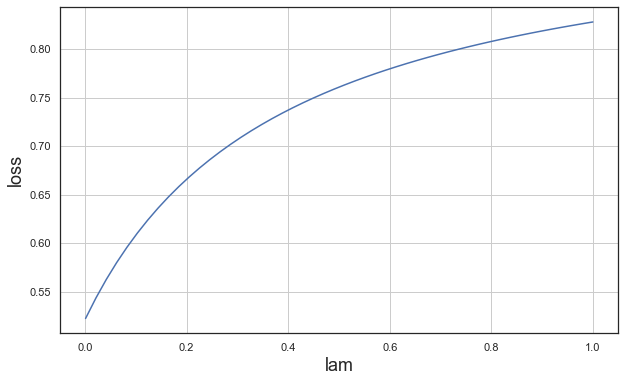

In [28]:
#确定准确率较高值所对应的岭回归系数
fig = plt.figure(figsize=(10,6))
plt.style.use('seaborn-ticks')

plt.xlabel('lam',fontsize=18)
plt.ylabel('loss',fontsize=18)

# x_major_locator = plt.MultipleLocator(1)
# ax = plt.gca()
# ax.xaxis.set_major_locator(x_major_locator)

# plt.xlim(0, 15)
# plt.ylim(0,40)

# plt.plot(range(0,50), MSE_Random_train, 'r', label='s1_train', marker = "o", markeredgecolor = 'white', markerfacecolor = '#ff9999', linewidth = 2.5)
# plt.plot(range(0,50), MSE_Random_text, 'darkred', label='s1_text', marker = "o", markeredgecolor = 'white', markerfacecolor = '#ff9999', linewidth = 2.5)

# plt.plot(range(0,50), MSE_Batch_train, 'b', label='s2_train', marker = "o", markeredgecolor = 'white', markerfacecolor = 'steelblue', linewidth = 2.5)
# plt.plot(range(0,50), MSE_Batch_text, 'mediumblue', label='s2_text', marker = "o", markeredgecolor = 'white', markerfacecolor = 'steelblue', linewidth = 2.5)
#plt.legend()

plt.grid()

#plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置字体，不然中文无法显示

#plt.title("岭回归系数曲线")

# plt.show()

plt.plot(alphas_to_test, avg_train_loss)

通过上述图像，确定岭回归系数lam = 0.1

In [29]:
theta = Ridge(train_x, train_y, 0.1)
theta

matrix([[ 5.41284398e+00],
        [ 3.81128708e-01],
        [-1.98914735e+00],
        [-3.00093950e-04],
        [ 4.44251614e+00],
        [ 8.31431155e-03],
        [ 8.64516340e-01],
        [-3.07396294e-02],
        [-5.83993347e+00],
        [ 6.09215084e-01],
        [ 5.27678204e-01],
        [ 1.49866854e+00]])

In [30]:
#岭回归模型下的平均训练误差和平均测试误差
avg_train_loss = avg_loss(Ridge(train_x, train_y, 0.1), train_x, train_y)
avg_text_loss = avg_loss(Ridge(text_x, text_y, 0.1), text_x, text_y)
print("avg_train_loss:", avg_train_loss, "，avg_text_loss:", avg_text_loss)

avg_train_loss: [0.60844357] ，avg_text_loss: [0.6494829]
